# Problem Statement

To classify and cluster Credit data to identify underlying relationship between each features and find the cluster which they are belong. 
And to find the characteritics and insigts of each clusters and provide business insights

In [ ]:
#importing all packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pf

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

# Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.9MB/s 


In [ ]:
link = 'https://drive.google.com/open?id=1xiZ0avzkR8hyQPqBjfjIvqnJLMSapQUF'

In [ ]:
fluff, id = link.split('=')
print (id)

1xiZ0avzkR8hyQPqBjfjIvqnJLMSapQUF


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Credit.xlsx')  
df = pd.read_excel('Credit.xlsx')

In [ ]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


# One Hot Encoding for all Cateorical Variables

In [ ]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical(df[col]).codes
df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,1,0,1,2,333
1,106.025,6645,483,3,82,15,0,1,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,1,580
3,148.924,9504,681,3,36,11,0,0,0,1,964
4,55.882,4897,357,2,68,16,1,0,1,2,331


# EDA Using Pandas Profiling

In [ ]:
eda=pf.ProfileReport(df)
eda.to_file("df.html")
eda

Number of variables,11
Number of observations,400
Total Missing (%),0.0%
Total size in memory,23.5 KiB
Average record size in memory,60.2 B
Numeric,7
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,1


# Scaling the data

In [ ]:
from sklearn. preprocessing import StandardScaler 
x_sc = StandardScaler()
x_scale = x_sc.fit_transform(df)

# Principal Component Analyzis for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_scale)

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumsum expaloned variance')

Text(5, 0.8, 'selected componenets')

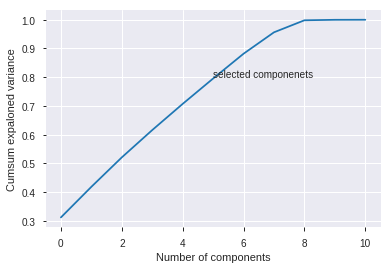

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumsum expaloned variance")
plt.annotate("selected componenets",xy=(5,0.8))

In [ ]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [ ]:
pca = PCA(6).fit(x_scale)

In [ ]:
str(pca.explained_variance_ratio_.sum())

'0.7953878852293489'

In [ ]:
pca.explained_variance_

array([3.44087377, 1.17401854, 1.12971434, 1.0484652 , 1.00478859,
       0.97333428])

# It is found as 6 Pricipal Components can explain 80 % of the data. 

In [ ]:
pca_df = pd.DataFrame(pca.components_, columns= df.columns)

In [ ]:
pca_df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0.444026,0.534197,0.534889,0.028411,0.076854,-0.016893,-0.007309,0.050053,0.015580,-0.017905,0.470369
1,-0.118893,-0.049869,-0.057649,-0.189067,-0.201416,0.352965,-0.258707,0.749274,-0.249217,-0.213351,0.207813
2,0.030502,-0.040944,-0.031236,0.279870,0.533826,-0.214394,0.094447,0.034559,-0.642021,-0.402294,-0.054858
3,-0.162414,-0.024418,-0.000236,0.503938,-0.377811,-0.574170,-0.134916,0.219938,-0.152208,0.350344,0.184867
4,-0.072461,-0.007014,0.006316,0.338787,-0.284760,0.268810,0.823979,0.093496,0.039053,-0.165207,0.100177
5,-0.053655,-0.040735,-0.010015,0.692278,0.265846,0.405711,-0.365600,0.018474,0.376725,-0.068478,0.014891


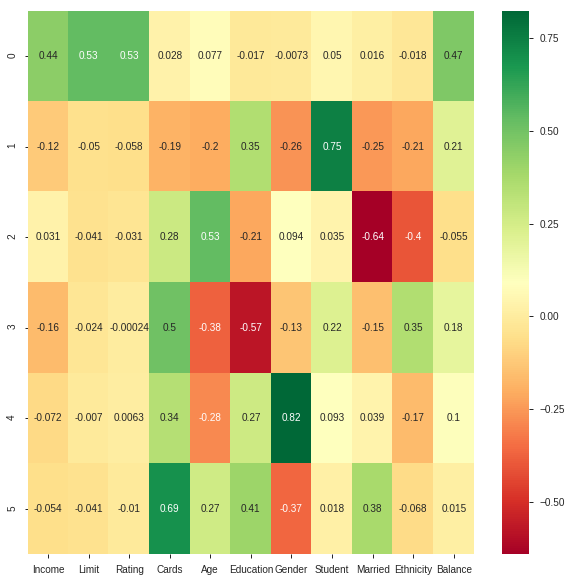

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_df,cmap='RdYlGn',annot=True)
plt.show();

# PCA Explanation



*   For the First Component Limit and Rating has great association and be taken in component
*   For Second Component Cards and Age has good association
* For third components Married and Etinicity will be considered
*For fourth components Age,Education and Gender might be considered
*For fifth components Educatuon has good relationship
*For sixth component cards,Age,Education has good relationship



In [ ]:
x_scale.shape

(400, 11)

# Transforming into PCA Components

In [ ]:
x_scaled_trnsf = pca.fit_transform(x_scale)

In [ ]:
x_scaled_trnsf = pd.DataFrame(x_scaled_trnsf,columns=('p1','p2','p3','p4','p5','p6'))
x_scaled_trnsf.head()
x_scaled_trnsf.shape

,p1,p2,p3,p4,p5,p6
0,-1.216280,-0.732082,-1.457680,0.634200,0.635667,-1.219315
1,2.330048,2.104393,0.288844,-0.430741,-0.767518,1.235790
2,1.967933,-1.023359,1.842193,0.095520,0.506775,-0.532803
3,3.899150,-0.049182,0.279980,0.689174,-0.819107,-0.955574
4,-0.021346,-0.759053,-0.749738,-1.234901,0.418576,-0.134915


(400, 6)

# K means Clustering

In [ ]:
from sklearn.cluster import KMeans
num_of_clusters=range(2,10)
error=[]

for num_clusters in num_of_clusters:
    clusters=KMeans(num_clusters)
    clusters.fit(x_scaled_trnsf)
    error.append(clusters.inertia_/100)
   
data=pd.DataFrame({"Cluster_Numbers":num_of_clusters,"Error_Term":error})  
data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,Cluster_Numbers,Error_Term
0,2,26.259585
1,3,23.236925
2,4,20.715741
3,5,18.915095
4,6,17.729491
5,7,16.621752
6,8,15.659471
7,9,14.792396


# Finding No of Cluster by Plotting Error Term and it is identified as Five clusters would be good for Clustering

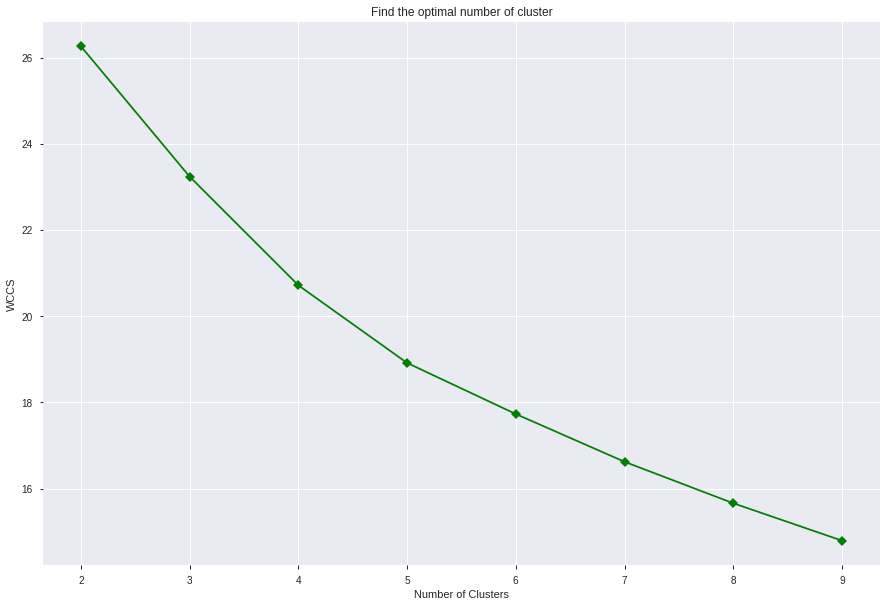

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(data.Cluster_Numbers,data.Error_Term,marker='D',color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('WCCS')
plt.title('Find the optimal number of cluster')
plt.show();

# Fitting Clusters

In [ ]:
#Build with 5 clusters
clusters = KMeans(5)
clusters.fit(x_scaled_trnsf)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([0, 4, 1, 1, 0, 1, 2, 1, 2, 4, 1, 2, 3, 3, 2, 2, 2, 3, 3, 0, 2, 3,
       2, 0, 2, 0, 4, 0, 1, 3, 3, 0, 1, 0, 2, 4, 3, 3, 3, 0, 2, 1, 3, 3,
       3, 3, 4, 4, 0, 4, 0, 0, 0, 0, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 2, 3,
       1, 3, 3, 0, 0, 1, 3, 0, 3, 0, 4, 2, 3, 2, 3, 2, 0, 2, 2, 1, 0, 2,
       0, 1, 0, 0, 0, 0, 2, 2, 4, 2, 4, 1, 2, 4, 4, 1, 3, 2, 2, 2, 0, 0,
       2, 2, 0, 3, 0, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 4, 2, 1, 0, 4, 0,
       0, 3, 3, 2, 2, 0, 2, 1, 4, 0, 1, 3, 0, 0, 3, 2, 2, 2, 3, 3, 4, 0,
       0, 2, 3, 4, 3, 2, 3, 2, 1, 2, 0, 0, 2, 2, 2, 3, 2, 3, 0, 0, 1, 2,
       0, 3, 3, 1, 0, 0, 3, 3, 1, 2, 2, 2, 1, 3, 3, 1, 0, 1, 2, 3, 1, 2,
       2, 0, 0, 3, 2, 4, 3, 0, 2, 4, 0, 1, 2, 0, 0, 0, 3, 3, 2, 0, 2, 3,
       4, 1, 4, 0, 1, 3, 3, 3, 3, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2,
       4, 3, 2, 2, 2, 2, 2, 4, 2, 0, 1, 0, 3, 0, 2, 2, 0, 3, 0, 1, 3, 2,
       0, 3, 3, 3, 2, 3, 2, 3, 4, 4, 3, 1, 2, 0, 3, 4, 3, 2, 1, 3, 2, 2,
       2, 0, 3, 0, 0, 3, 0, 1, 0, 2, 3, 0, 2, 3, 0,

# Identifying Clusters and Mapping back to original data

In [ ]:
df['Cluster']=clusters.labels_
df.shape

(400, 12)

In [ ]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Cluster
0,14.891,3606,283,2,34,11,1,0,1,2,333,0
1,106.025,6645,483,3,82,15,0,1,1,1,903,4
2,104.593,7075,514,4,71,11,1,0,0,1,580,1
3,148.924,9504,681,3,36,11,0,0,0,1,964,1
4,55.882,4897,357,2,68,16,1,0,1,2,331,0


# For Visualization fitting PCA componets to get important 2 components as X and Y

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
pca_2d.shape

(400, 2)

In [ ]:
df['x'] = pca_2d[:,0]
df['y'] =pca_2d[:,1]
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Cluster,x,y
0,14.891,3606,283,2,34,11,1,0,1,2,333,0,-1147.489034,10.036888
1,106.025,6645,483,3,82,15,0,1,1,1,903,4,1951.563190,48.214556
2,104.593,7075,514,4,71,11,1,0,0,1,580,1,2321.267241,-342.031518
3,148.924,9504,681,3,36,11,0,0,0,1,964,1,4786.146781,-379.056834
4,55.882,4897,357,2,68,16,1,0,1,2,331,0,126.732092,-214.036436


# Plotting Centroids

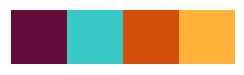

In [ ]:
import seaborn as sns

plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [ ]:
centers = np.array(clusters.cluster_centers_)
centers

array([[-0.35104979, -0.5343016 , -0.15256741,  0.07645403,  1.0382853 ,
        -0.13606158],
       [ 3.3921921 , -0.25989236,  0.25502837, -0.36206827,  0.08167955,
        -0.20449816],
       [-1.82559862, -0.03432802,  0.29574768, -0.35610718, -0.2935389 ,
        -0.07911683],
       [ 0.36668025, -0.1593009 , -0.3322779 ,  0.22592539, -0.85006795,
         0.31427621],
       [ 0.28982544,  2.76199708,  0.06736073,  0.90335286,  0.27203972,
         0.06734598]])

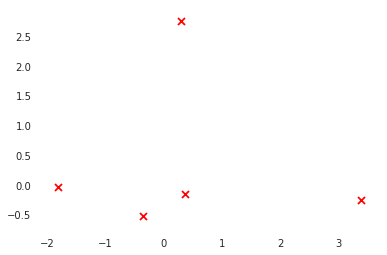

In [ ]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

In [ ]:
groups = {'Cluster1': (0.59517232, -0.20986792, -0.28791143,  0.2367619 , -0.7811009 ,
        0.36797018),
          'Cluster2': (-1.7682467 ,  0.03287189,  0.17707021, -0.28690528, -0.61204388,
         0.08479096),
          'cluster3': (-0.67495263, -0.48511164, -0.03419259, -0.02526076,  0.9620967 ,
        -0.27286119),
          'Cluster4': (3.45968124, -0.25524529,  0.25685231, -0.38977886,  0.14988262,
        -0.23710028),
          'Cluster5':(0.27978291,  2.72563573,  0.05042612,  0.84939969,  0.26034485,
         0.06385248)}

In [ ]:
n=400

In [ ]:
data=pd.concat([pd.DataFrame(df.x),pd.DataFrame(df.y),pd.DataFrame(df.Cluster)],axis=1)
data.head()

,x,y,Cluster
0,-1147.489034,10.036888,0
1,1951.563190,48.214556,4
2,2321.267241,-342.031518,1
3,4786.146781,-379.056834,1
4,126.732092,-214.036436,0


# Plotting 2 dimension Clustered data using X and Y principal componets. 

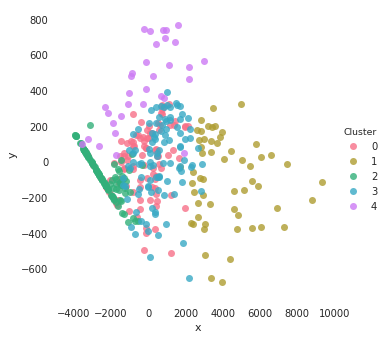

In [ ]:
facet = sns.lmplot(data=data, x='x', y='y', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
df.to_csv('data.csv')
!cp data.csv drive/My\ Drive/

# Insights

**Cluster 1 can be called as High Riskier**
  
*   Average income is 44
*Credit Limit is in between 1000 to 3500 for most of the peoples and an average = 4704
*Credit card Balance for most of the people is less than 300 on an average of 352
*Rating is in between 50 to 150
*There are no students
*Age is starting from 30 but most of the people are greater than 50
*Cards for most of the peoples are 1 and 2 few are 3 and 4
 *Both married and unmarried people
*The above are characteristics of peoples in High riskier peoples. The most of the people has card limit 1000 to 3500 and balance on their card is 352 is very less and they don’t have much income pay back the credits. Hence they are High Riskier People

**Cluster 2 can be called Low Risk**


*   Average income 45
*Average Credit limit is 4740
*Average Rating is 355
*Cards are given as 1, 2 and 3 
*Age is in between 40 to 60
Education in between 10 to 15
 *Almost all are males
*Most of them are married
*Credit Balance is in between 400 to 800 on an average of 521
*The above are the characteristics of Low riskier customers their average income is 45 and credit limit is 4740 and their balance is low in between 400 to 800 which is very low and kept this customers as Low riskier.


**Cluster 3 can be called as Safe**

*  Average income is 44
*Average limit is 4702
*Average rating is 352
*Cards are most of the cards are 2, 3 and 4
*Age is 40 to 70	
*Education is in between 10 to 18
*Almost all are females
*No students
*Most of them are married
*Balance of average 514 and 400 to 1000
*The above are the characteristics of safe cluster whore highly educated women’s and an average income 44 and average credit limit of 4702 and have credit balance in between 400 to 1000 which is good and they are good spender as well as they pay back credits often. These people are safe people for giving credit.


**Cluster 4 can be called as potential **

*  Average income of 45
*Credit Limit is 4750
*Average rating of 355
*Most of the cards are in 1, 2 and 3
*Age is in between  40 to 70
*Most of them are 12 to 18
*Both men and women however men is high
*There are no students
*Both married and unmarried
*Balance of an average 522 and most of the people are in between 500 to 1500
*The above are the characteristics of potential customers who have good income and highly educated people and they are spending very less and capable paying back. These are the peoples are high potential for getting loan and paying back.

**Cluster 5 can be called as High active**

*   Average income is 45
*Credit Limit is 4749
*Average rating is 355
*Most of the cards are in 2 and 3
*Age is in between 50 to 70 for of the customers
*Education is very high 12 to 20
*Mostly female and few males
*All are students
*Both married and unmarried
*Balance of an average of 521 and most of them are clustered as 600 to 1600
*The above are characteristics of high active customers they are currently *studying and have good income and high potential to pay back credits. These customers credit limit can be increased and encourage to spent more as they are highly active.
